In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

from MST import find_MST
from optimal import find_optimal
from find_way import return_way

def create_point():
    return (rd.random() * 10, rd.random() * 10)

def dist(e1, e2):
    e1 = np.array(e1)
    e2 = np.array(e2)
    return np.sqrt(np.sum((e1-e2) ** 2))

In [7]:
N = 10

points = np.array([create_point() for _ in range(N)])

In [8]:
edges = []

for idx1, e1 in enumerate(points):
    for idx2, e2 in enumerate(points):
        if idx1 == idx2:
            continue
        edges.append((dist(e1, e2), idx1, idx2))

31.983582627324495 48.05899714863861


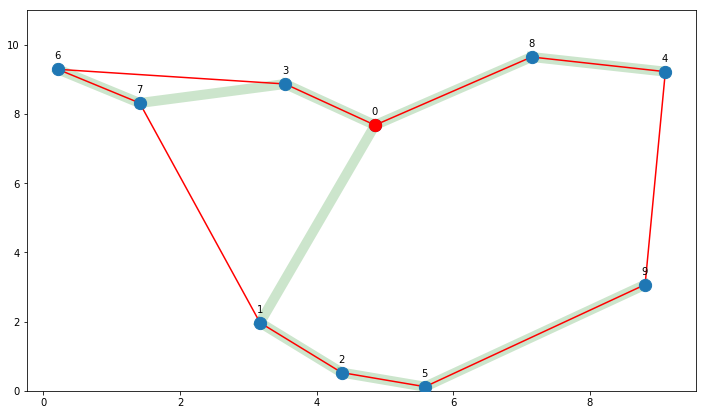

In [9]:
plt.figure(figsize=(12,7))
plt.ylim((0,11))

plt.scatter(points.T[0], points.T[1], s=150, zorder=10)
plt.scatter(points.T[0,0], points.T[1, 0], c='red', s=150, zorder=11)

for idx,el in enumerate(points):
    plt.text(el[0]-.05, el[1]+.3, str(idx))
for w, idx1, idx2 in find_MST(N, len(edges), edges):
    a1, b1= points[idx1]
    a2, b2 = points[idx2]
    plt.plot([a1,a2], [b1,b2], c = 'green', linewidth=10.0, alpha=.2, zorder=1)
    
optimal_w, optimal_way = find_optimal(N, edges)
for idx1, idx2 in list(zip(optimal_way, optimal_way[1:])):
    a1, b1= points[idx1]
    a2, b2 = points[idx2]
    plt.plot([a1,a2], [b1,b2], c = 'red', linewidth=1.5, zorder=2)
    
print(optimal_w, return_way(N, find_MST(N, len(edges), edges))[0])

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

from MST import find_MST
from optimal import find_optimal
from find_way import return_way

def create_point():
    return (rd.random() * 10, rd.random() * 10)

def dist(e1, e2):
    e1 = np.array(e1)
    e2 = np.array(e2)
    return np.sqrt(np.sum((e1-e2) ** 2))

In [20]:
def experiments(_range, n_iter):
    res = []
    
    for N in _range:
        arr = []
        for _ in range(n_iter):

            points = np.array([create_point() for _ in range(N)])    
            edges = []
            for idx1, e1 in enumerate(points):
                for idx2, e2 in enumerate(points):
                    if idx1 == idx2:
                        continue
                    edges.append((dist(e1, e2), idx1, idx2))

            arr.append((find_optimal(N, edges)[0], return_way(N, find_MST(N, len(edges), edges))[0]))

        _opt = np.array(arr).T[0]
        _mst = np.array(arr).T[1]

        res.append((N, np.mean(_mst - _opt), np.std(_mst - _opt)))
        
    return res

In [25]:
for N, mean, std in experiments(range(2,11), 10):
    print('N = {0:2d}: mean = {1:6.3f}, std={2:.3f}'.format(N, mean, std))

N =  2: mean =  0.000, std=0.000
N =  3: mean =  1.353, std=1.023
N =  4: mean =  3.611, std=2.277
N =  5: mean =  7.225, std=1.756
N =  6: mean =  5.604, std=3.806
N =  7: mean =  6.947, std=0.642
N =  8: mean =  8.621, std=2.912
N =  9: mean = 10.882, std=0.315
N = 10: mean = 16.033, std=0.612
